Warning! Audio has two channels!


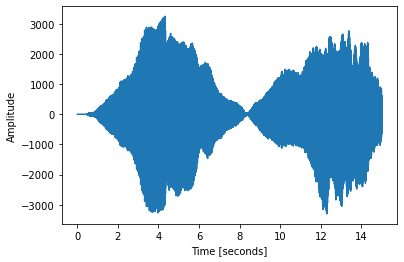

In [47]:
from MyAudioTools import MyAudioSegment, compress_log
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import math

audio = MyAudioSegment.from_file("audio/crown.mp3", format="mp3")[:15000]
audio.plot_waveform()



In [2]:
audio.log_freq_spectrogram(w_length = 0.200, hop_factor=0.5)

Warning! Audio has two channels!


array([[1.27112213e-11, 0.00000000e+00, 0.00000000e+00, ...,
        1.16381349e-09, 8.26786494e-10, 5.87348615e-09],
       [1.80558726e-05, 0.00000000e+00, 0.00000000e+00, ...,
        9.09732279e-04, 1.48169380e-03, 1.08829051e-02],
       [3.04592856e-05, 0.00000000e+00, 0.00000000e+00, ...,
        2.12914411e-03, 2.50410540e-03, 1.84753066e-02],
       ...,
       [3.55223001e-01, 0.00000000e+00, 0.00000000e+00, ...,
        8.75815570e-02, 8.40290085e-02, 3.95809765e-01],
       [9.74973423e-01, 0.00000000e+00, 0.00000000e+00, ...,
        9.05981198e-02, 7.46587906e-02, 3.62132803e-01],
       [3.33795108e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.34216721e+00, 1.29788008e+00, 1.22346699e+01]])

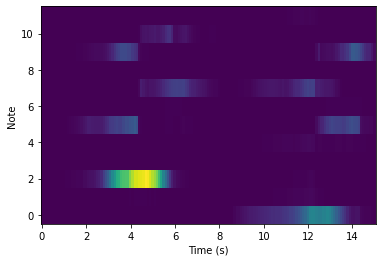

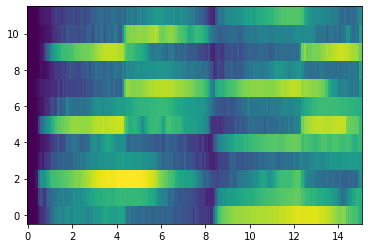

In [6]:
audio.plot_chroma()
plt.show()
compressed = compress_log(audio.chroma,10)
plt.pcolormesh(np.linspace(0,15,audio.chroma.shape[0]),np.arange(12),compressed.T, shading='auto')

Warning! Audio has two channels!
661500


In [30]:
# Construct chord vectors

# (5.5) lambda

note_names = ['C','C#','D','Eb','E','F','F#','G','G#','A','Bb','B']
qualities = ['major', 'minor']
chord_names = [note + ' ' + qualities[0] for note in note_names] + [note + ' ' + qualities[1] for note in note_names]

# Row for each major chord
major_minor_chords = np.zeros((24,12))
for bass_note in range(12):
    major_minor_chords[bass_note, bass_note] = 1
    major_minor_chords[bass_note + 12, bass_note] = 1
    major_minor_chords[bass_note, (bass_note + 4)%12] = 1
    major_minor_chords[bass_note + 12, (bass_note + 3)%12] = 1
    major_minor_chords[bass_note, (bass_note + 7)%12] = 1
    major_minor_chords[bass_note + 12, (bass_note + 7)%12] = 1

chords = [{
    "name" : chord_names[i],
    "template" : major_minor_chords[i]
} for i in range(24)]


In [80]:
with open('labels-crown-1.txt', 'r') as reader:
    # Read & print the entire file
    markers = reader.readlines()
markers = [float(row.split('\t')[0]) for row in markers]
true_chords = [
    ('D','minor'),
    ('G','minor'),
    ('C','major'),
    ('F','major'),
    ('D','minor')
]

def chord_to_index(chord_tup):
    return note_names.index(chord_tup[0]) + 12*qualities.index(chord_tup[1])

annotated = {
    "onsets": markers,
    "chords": [chord_to_index(true_chords[i]) for i in range(len(true_chords))]
} 



In [81]:
# (5.6) s(x,y)

def similarity(a,b):
    if np.linalg.norm(a)*np.linalg.norm(b) == 0:
        return 0
    else:
        return np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))

def template_mapping(chroma):
    #chroma has shape (T,12)
    chroma_length = len(chroma) 
    mapped_chords = []
    
    for sample in range(chroma_length):
        max_sim = -100
        max_idx = None
        for chord in range(24):
            # Check how similar they are
            if max_sim < similarity(chroma[sample],chords[chord]["template"]):
                max_sim = similarity(chroma[sample],chords[chord]["template"])
                max_idx = chord
        #print('{}\t{}\t{}'.format(t, chord_names[max_idx], max_sim))
        mapped_chords.append(max_idx)
        
    return np.array(mapped_chords)

test = template_mapping(compressed)

In [93]:
def floor_to_step_size(a, step_size):
    return np.floor(float(a) / step_size) * step_size

def match_annotated(annotated_data, test_data, feature_rate):
    '''Input: 
        Annotated data {onsets, chords} 
        Template mapping test data (array) for each time frame
        Feature rate in Hz for test data to match onset times
        '''
    scale_factor = int(1/feature_rate)
    scaled_onsets = np.floor(np.array(annotated_data["onsets"]) * scale_factor)
    start_index = int(scaled_onsets[0])
    current = 0
    matches = 0
    
    for idx in range(start_index,len(test_data)):
        if idx >= scaled_onsets[current + 1]:
            current += 1
        #print(test_data[idx], annotated["chords"][current])
        if test_data[idx] == annotated["chords"][current]:
            matches += 1
            
    return matches/(len(test_data)-start_index)
        

match_annotated(annotated, test, 0.1)


14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
19 14
19 14
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
0 19
0 19
0 19
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
5 0
5 0
5 0
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5


0.9420289855072463

## Tests

Here we do some testing on the simple template-based chord recognition algorithm.

We consistently use 24 chord templates (major/minor in 12 keys)

### Test 1:

We use 15 s from crown.mp3

We use window size 0.2, hop size 0.1

Compress chroma with gamma = 10

We use annotated ground truth as in labels-crown-1.txt,
labels constructed by listening and clicking and 

    true_chords = [
        ('D','minor'),
        ('G','minor'),
        ('C','major'),
        ('F','major'),
        ('D','minor')
    ]

Ratio correctly classified: 0.9420289855072463

> Noticed some systematic delay in labels, and subtracted 0.3 s from each label, suggested by listening and checking the label times. This made the performance go up to 0.99. We can test performance for different values of the delay constant.

In [85]:
crown_1 = MyAudioSegment.from_file("audio/crown.mp3", format="mp3")[:15000]
crown_1.log_freq_spectrogram(w_length = 0.200, hop_factor=0.5)
with open('labels-crown-1.txt', 'r') as reader:
    # Read & print the entire file
    markers = reader.readlines()
crown_1_markers = [float(row.split('\t')[0]) for row in markers]
crown_1_chords = [
    ('D','minor'),
    ('G','minor'),
    ('C','major'),
    ('F','major'),
    ('D','minor')
]
match_annotated({
                "onsets": crown_1_markers,
                "chords": [chord_to_index(crown_1_chords[i]) for i in range(len(crown_1_chords))]},
                template_mapping(compress_log(crown_1.chroma,10)), 
                0.1,
)

Warning! Audio has two channels!
[0.9420289855072463, 0.9420289855072463, 0.9420289855072463, 0.9420289855072463, 0.9420289855072463]


14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
14 14
19 14
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 19
0 19
0 19
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
5 0
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5


0.9420289855072463